# Keenan / 0706022310011

## Import Library

In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

In [73]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/property_data_clustering_clean.csv"
df = pd.read_csv(url)
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [74]:
# Rename columns to remove spaces and parentheses
df = df.rename(columns={
    "Area Category": "AreaCategory",
    "Nama Daerah": "NamaDaerah",
    "Luas Tanah (m2)": "LuasTanah",
    "Luas Bangunan (m2)": "LuasBangunan",
    "Jumlah Kamar": "JumlahKamar",
    "Jumlah Kamar Mandi": "JumlahKamarMandi",
    "Tingkat/Lantai ": "Lantai",
    "Harga Penawaran (dari Owner)": "HargaPenawaranOwner",
    "Terjual/Belum": "Terjual",
    "Arah Hadap Rumah": "ArahHadapRumah",
    "Posisi Rumah": "PosisiRumah",
    "Lebar Jalan Depan Rumah (ROW)": "LebarJalanDepanRumah"
})

# Display the first few rows to show the changes
display(df.head())

,AreaCategory,NamaDaerah,LuasTanah,LuasBangunan,JumlahKamar,JumlahKamarMandi,Lantai,HargaPenawaranOwner,Terjual,ArahHadapRumah,PosisiRumah,LebarJalanDepanRumah
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [75]:
# describe data
df.describe()

,LuasTanah,LuasBangunan,JumlahKamar,JumlahKamarMandi,Lantai,HargaPenawaranOwner
count,308.000000,308.000000,308.000000,308.000000,308.000000,3.080000e+02
mean,226.951299,266.688312,4.275974,3.337662,1.840909,5.014301e+09
std,201.821447,213.161697,1.643804,1.627215,0.507932,8.311434e+09
min,14.000000,14.000000,1.000000,1.000000,1.000000,1.600000e+08
25%,96.000000,120.000000,3.000000,2.000000,2.000000,1.400000e+09
50%,162.500000,200.000000,4.000000,3.000000,2.000000,2.699500e+09
75%,283.000000,328.750000,5.000000,4.000000,2.000000,4.891667e+09
max,1561.000000,1200.000000,13.000000,13.000000,4.000000,9.900000e+10


In [76]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   AreaCategory          308 non-null    object
 1   NamaDaerah            308 non-null    object
 2   LuasTanah             308 non-null    int64 
 3   LuasBangunan          308 non-null    int64 
 4   JumlahKamar           308 non-null    int64 
 5   JumlahKamarMandi      308 non-null    int64 
 6   Lantai                308 non-null    int64 
 7   HargaPenawaranOwner   308 non-null    int64 
 8   Terjual               308 non-null    object
 9   ArahHadapRumah        308 non-null    object
 10  PosisiRumah           308 non-null    object
 11  LebarJalanDepanRumah  308 non-null    object
dtypes: int64(6), object(6)
memory usage: 29.0+ KB


In [77]:
# Display unique values for all columns
for col in df.columns:
    print(f"Unique values for column '{col}':")
    print(df[col].unique())
    print("\n")

Unique values for column 'AreaCategory':
['Standard' 'Below Standard' 'Sangat Premium' 'Premium']


Unique values for column 'NamaDaerah':
['Citraland' 'Setro Baru Utara' 'Kenjeran' 'Gubeng' 'Sawahan' 'Mulyorejo'
 'Tegalsari' 'Tambaksari' 'Kalilom Lor Timur' 'Jelidro Manukan' 'Kalilom'
 'Bulak Cumpat barat' 'Tambak Wedi' 'Lebak Jaya'
 'Simo Gunung Kramat Timur' 'Medokan Ayu' 'Lebak Rejo' 'Medokan Sawah'
 'Klampis Ngasem' 'Medokan Sawah Timur' 'Citraland Golf Avenue'
 'Wisata Semanggi' 'Kedung Klinter' 'Gading Indah Regency'
 'Gunung Anyar Mas' 'Kutisari Utara' 'Mulyosari Tengah' 'Kapas Madya'
 'Bratang Gede' 'Citraland Utara' 'Lebak Jaya Utara' 'Mulyosari Timur'
 'Pakuwon City' 'Pakuwon city' 'Pakuwon City Florence' 'Pantai Mentari'
 'Royal Residence' 'Villa Kalijudan Indah' 'Sutorejo Timur'
 'Springville Residence' 'Sukomanunggal' 'Surabaya Pusat' 'Su' 'Mulyosari'
 'Krukah Selatan' 'Mulyosari Utara' 'Pondok Benowo Indah' 'Kenjeran Indah'
 'Tenggilis' 'Wisma Mukti' 'wonokromo' 'Sakura 

In [78]:
# Drop the 'Terjual' column
df = df.drop('Terjual', axis=1)

# Display the first few rows to show the change
display(df.head())

# Di drop karena isi valuenya cuma 1

,AreaCategory,NamaDaerah,LuasTanah,LuasBangunan,JumlahKamar,JumlahKamarMandi,Lantai,HargaPenawaranOwner,ArahHadapRumah,PosisiRumah,LebarJalanDepanRumah
0,Standard,Citraland,240,300,4,3,2,3500000000,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Barat,Standard,1-2 Mobil


In [79]:
df = df.drop(columns=["NamaDaerah"])
# Di drop karena data nya inkonsisten dan banyak varian data

# Display the first few rows to show the change
display(df.head())

,AreaCategory,LuasTanah,LuasBangunan,JumlahKamar,JumlahKamarMandi,Lantai,HargaPenawaranOwner,ArahHadapRumah,PosisiRumah,LebarJalanDepanRumah
0,Standard,240,300,4,3,2,3500000000,Utara,Standard,1-2 Mobil
1,Below Standard,30,60,2,1,2,287799000,Utara,Standard,< 1 Mobil
2,Standard,170,170,5,4,2,2699999999,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,187,250,5,5,2,3100000000,Utara,Standard,1-2 Mobil
4,Premium,350,600,5,5,2,5000000000,Barat,Standard,1-2 Mobil


## EDA

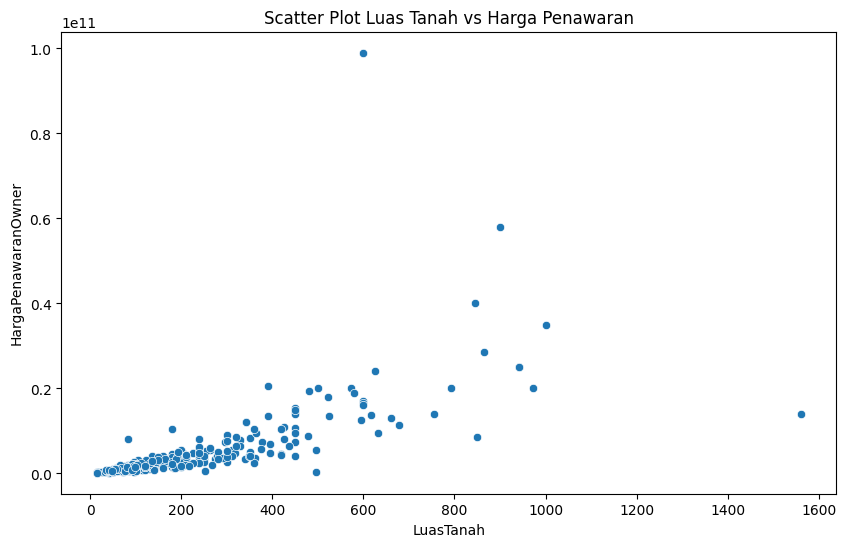

In [80]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='LuasTanah', y='HargaPenawaranOwner')
plt.title('Scatter Plot Luas Tanah vs Harga Penawaran')
plt.xlabel('LuasTanah')
plt.ylabel('HargaPenawaranOwner')
plt.show()

Dari scatter plot tersebut, terlihat adanya hubungan positif antara Luas Tanah dan Harga Penawaran. Ini berarti bahwa seiring dengan meningkatnya luas tanah, cenderung diikuti dengan peningkatan harga penawaran properti.

Sebagian besar titik data terkonsentrasi pada area dengan Luas Tanah yang lebih kecil dan Harga Penawaran yang lebih rendah. Namun, ada juga beberapa titik data yang menyebar di area dengan Luas Tanah dan Harga Penawaran yang jauh lebih tinggi, menunjukkan adanya properti mewah atau premium dengan luas tanah yang sangat besar dan harga yang sangat tinggi.

Scatter plot ini mengkonfirmasi intuisi umum bahwa ukuran properti (dalam hal luas tanah) merupakan faktor penting yang mempengaruhi harga jualnya. Namun, penyebaran titik-titik data menunjukkan bahwa ada faktor-faktor lain yang juga mempengaruhi harga, karena untuk luas tanah yang sama, harga penawaran bisa bervariasi cukup signifikan.

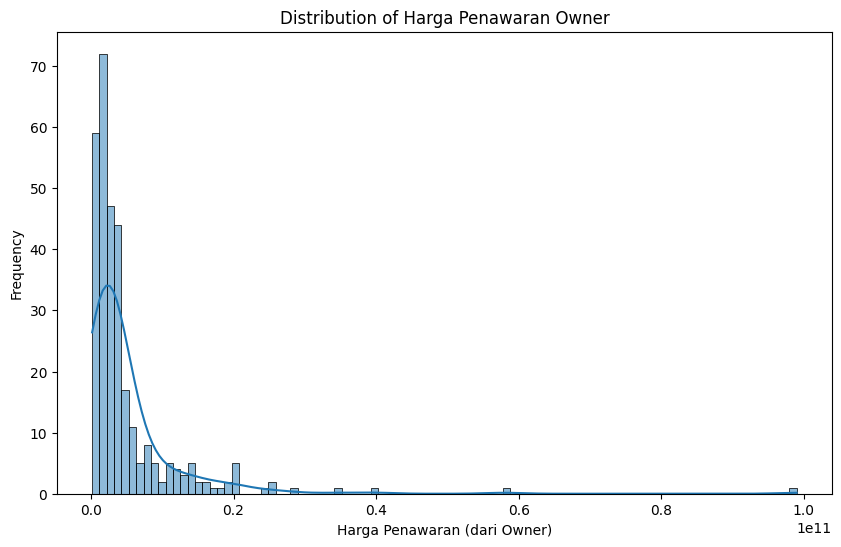

In [81]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='HargaPenawaranOwner', kde=True)
plt.title('Distribution of Harga Penawaran Owner')
plt.xlabel('Harga Penawaran (dari Owner)')
plt.ylabel('Frequency')
plt.show()

Histogram Harga Penawaran menunjukkan distribusi yang sangat miring ke kanan (right-skewed). Ini berarti sebagian besar properti memiliki harga penawaran yang relatif rendah, dan hanya ada sedikit properti dengan harga penawaran yang sangat tinggi.

Puncak tertinggi (modus) dari distribusi berada pada rentang harga yang lebih rendah, menunjukkan bahwa harga properti yang paling sering muncul ada di kisaran tersebut.

Ekor panjang di sisi kanan histogram menunjukkan adanya nilai outlier atau properti dengan harga yang sangat tinggi yang jauh dari sebagian besar data. Ini konsisten dengan pengamatan kita dari scatter plot sebelumnya yang menunjukkan beberapa properti dengan harga sangat tinggi.

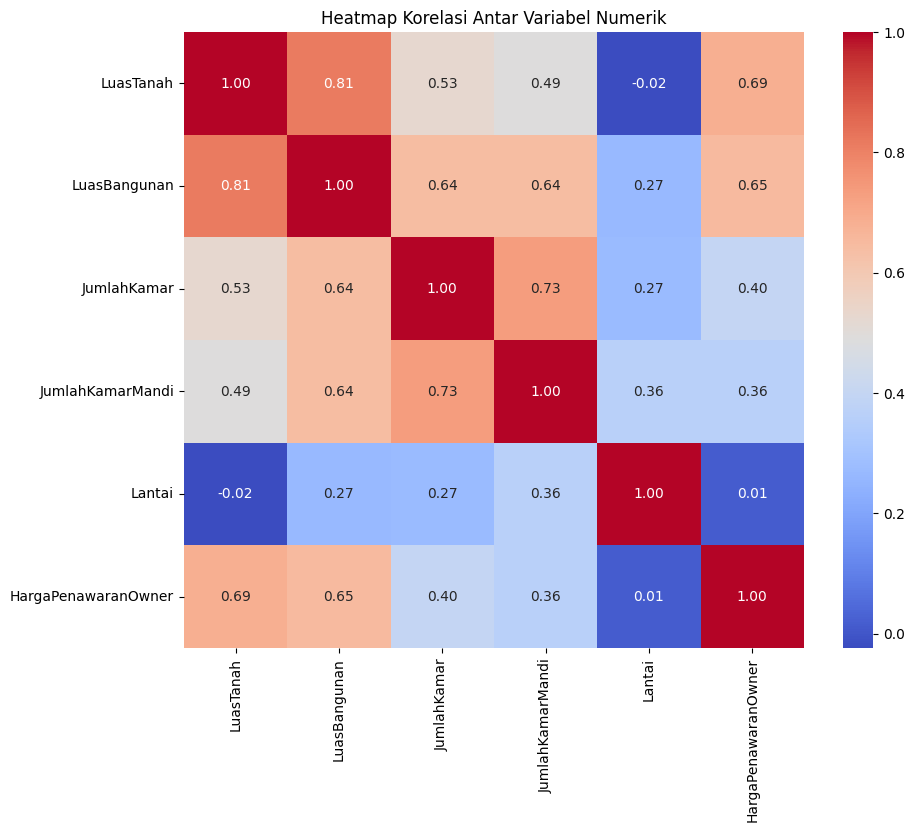

In [82]:
# Select only numerical columns for correlation analysis
numerical_cols = df.select_dtypes(include=np.number).columns

# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Variabel Numerik')
plt.show()

Heatmap menunjukkan bahwa LuasTanah dan LuasBangunan memiliki korelasi positif terkuat dengan HargaPenawaranOwner, mengindikasikan bahwa properti yang lebih luas cenderung memiliki harga lebih tinggi. JumlahKamar dan JumlahKamarMandi juga berkorelasi positif satu sama lain dan moderat dengan luas dan harga. Sebaliknya, Lantai memiliki korelasi yang sangat lemah dengan semua variabel lain, termasuk harga. Temuan ini menyoroti pentingnya luas properti sebagai prediktor harga dalam dataset ini.

## Data Transformation

In [83]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataframe to avoid modifying the original
df_encoded_label = df.copy()

# Define the mapping for 'AreaCategory'
area_category_mapping = {
    'Below Standard': 1,
    'Standard': 2,
    'Premium': 3,
    'Sangat Premium': 4
}

# Apply the mapping to 'AreaCategory'
df_encoded_label['AreaCategory'] = df_encoded_label['AreaCategory'].map(area_category_mapping)

# Apply Label Encoding to other categorical columns
categorical_cols_label = ['ArahHadapRumah', 'PosisiRumah', 'LebarJalanDepanRumah']
label_encoders = {}

for col in categorical_cols_label:
    label_encoders[col] = LabelEncoder()
    df_encoded_label[col] = label_encoders[col].fit_transform(df_encoded_label[col])

# Display the first few rows of the encoded dataframe
display(df_encoded_label.head())

,AreaCategory,LuasTanah,LuasBangunan,JumlahKamar,JumlahKamarMandi,Lantai,HargaPenawaranOwner,ArahHadapRumah,PosisiRumah,LebarJalanDepanRumah
0,2,240,300,4,3,2,3500000000,3,2,0
1,1,30,60,2,1,2,287799000,3,2,1
2,2,170,170,5,4,2,2699999999,1,0,0
3,4,187,250,5,5,2,3100000000,3,2,0
4,3,350,600,5,5,2,5000000000,0,2,0


In [84]:
from sklearn.preprocessing import StandardScaler

# Select the numerical columns to scale
numerical_cols_to_scale = ['LuasTanah', 'LuasBangunan', 'JumlahKamar', 'JumlahKamarMandi', 'Lantai', 'HargaPenawaranOwner']

# Initialize the StandardScaler
scaler = StandardScaler()

# Create a copy of the dataframe for scaling
df_scaled = df_encoded_label.copy()

# Apply scaling to the selected numerical columns
df_scaled[numerical_cols_to_scale] = scaler.fit_transform(df_scaled[numerical_cols_to_scale])

# Display the first few rows of the scaled dataframe
display(df_scaled.head())

,AreaCategory,LuasTanah,LuasBangunan,JumlahKamar,JumlahKamarMandi,Lantai,HargaPenawaranOwner,ArahHadapRumah,PosisiRumah,LebarJalanDepanRumah
0,2,0.064760,0.156529,-0.168161,-0.207847,0.313723,-0.182491,3,2,0
1,1,-0.977457,-0.971209,-1.386831,-1.438941,0.313723,-0.569600,3,2,1
2,2,-0.282646,-0.454330,0.441174,0.407700,0.313723,-0.278901,1,0,0
3,4,-0.198276,-0.078417,0.441174,1.023247,0.313723,-0.230696,3,2,0
4,3,0.610683,1.566201,0.441174,1.023247,0.313723,-0.001723,0,2,0


In [85]:
# get stastical information on the new dataset
df_scaled.describe()

,AreaCategory,LuasTanah,LuasBangunan,JumlahKamar,JumlahKamarMandi,Lantai,HargaPenawaranOwner,ArahHadapRumah,PosisiRumah,LebarJalanDepanRumah
count,308.000000,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,308.000000,308.000000,308.000000
mean,2.396104,2.306957e-17,8.651089e-17,-1.153478e-16,2.883696e-17,1.672544e-16,-2.451142e-17,2.152597,2.071429,0.788961
std,0.802430,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00,1.011059,0.380419,0.957199
min,1.000000,-1.056864e+00,-1.187359e+00,-1.996166e+00,-1.438941e+00,-1.658248e+00,-5.850015e-01,0.000000,0.000000,0.000000
25%,2.000000,-6.499032e-01,-6.892750e-01,-7.774956e-01,-8.233942e-01,3.137225e-01,-4.355666e-01,1.000000,2.000000,0.000000
50%,2.000000,-3.198678e-01,-3.133623e-01,-1.681606e-01,-2.078471e-01,3.137225e-01,-2.789613e-01,3.000000,2.000000,0.000000
75%,3.000000,2.781662e-01,2.916222e-01,4.411744e-01,4.077000e-01,3.137225e-01,-1.477895e-02,3.000000,2.000000,2.000000
max,4.000000,6.620801e+00,4.385546e+00,5.315854e+00,5.947624e+00,4.257663e+00,1.132640e+01,3.000000,4.000000,2.000000


## Silhouette Score

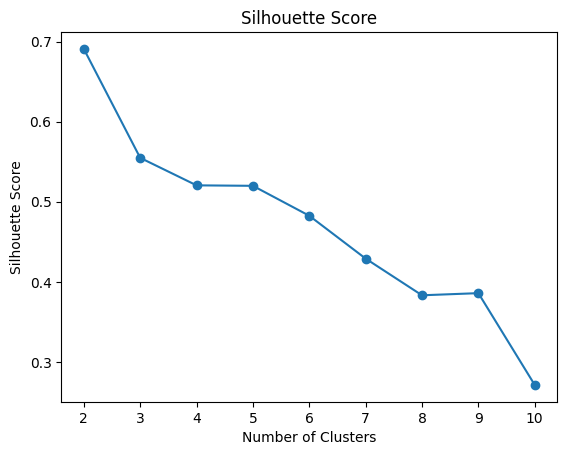

In [86]:
# this is way to show only 1 sillhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')
    cluster_labels = agglo_model.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

## Comparing Silhouette Score to get best combination of linkage and metric

Skipping Ward linkage with Manhattan metric (not supported).


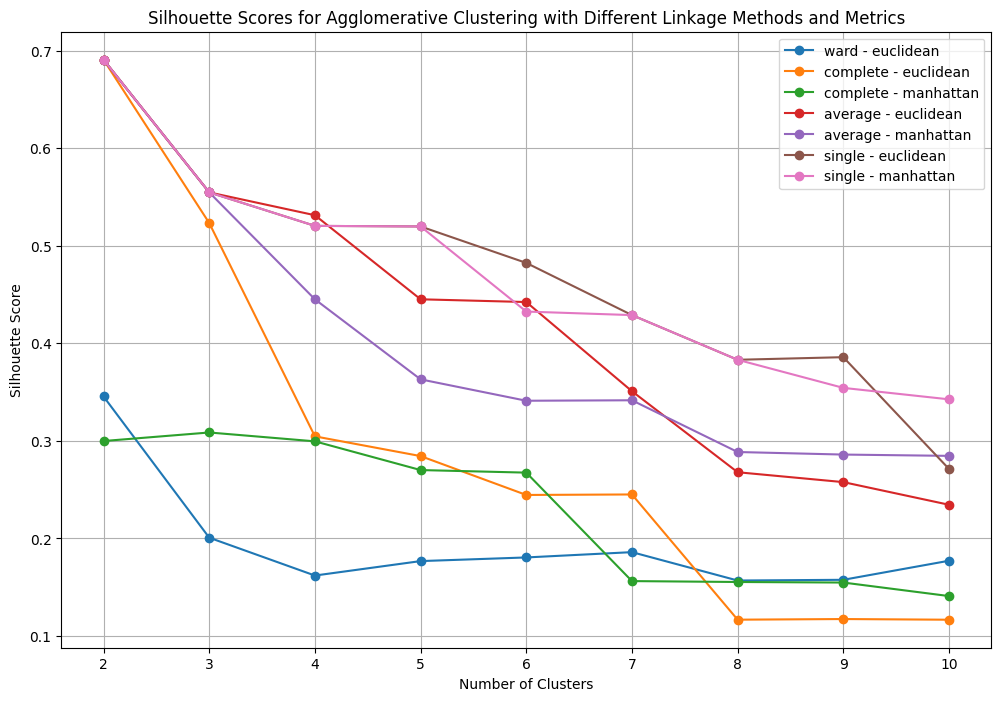

Best Silhouette Score: 0.6907984484177603
Optimal Number of Clusters: 2
Optimal Linkage Method: complete
Optimal Metric: euclidean


In [87]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_scaled)
            silhouette_avg = silhouette_score(df_scaled, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

### Model 1

In [92]:
# Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc = agglo.fit_predict(df_scaled)

In [93]:
# Evaluation
ss = silhouette_score(df_scaled, y_hc)
print(ss)

0.6907984484177603


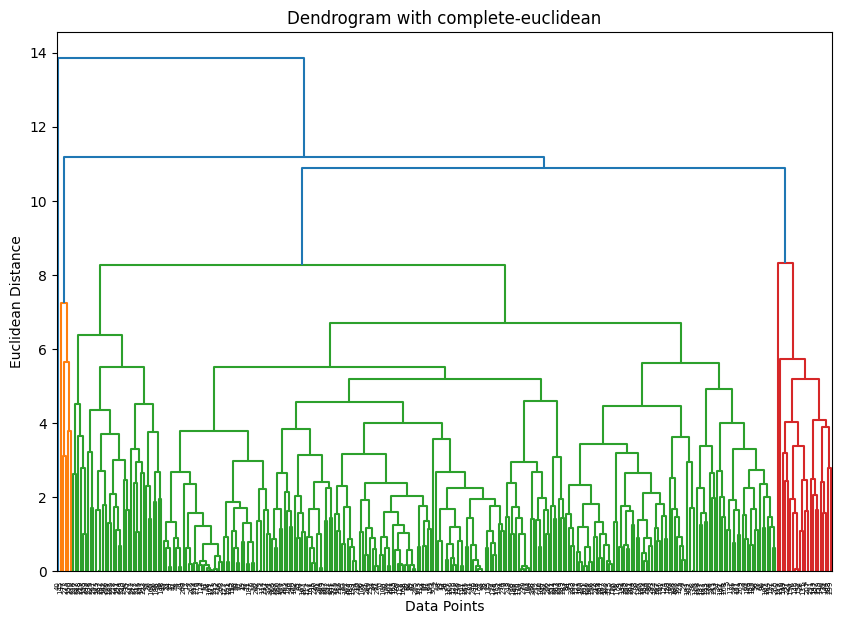

In [94]:
# Average Distance
linked = linkage(df_scaled, method=best_linkage, metric=best_metric)

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with " + best_linkage + "-" + best_metric)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

### Model 2

In [95]:
# Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage='ward', metric='euclidean')
y_hc = agglo.fit_predict(df_scaled)

In [96]:
# Evaluation
ss = silhouette_score(df_scaled, y_hc)
print(ss)

0.34549995907806413


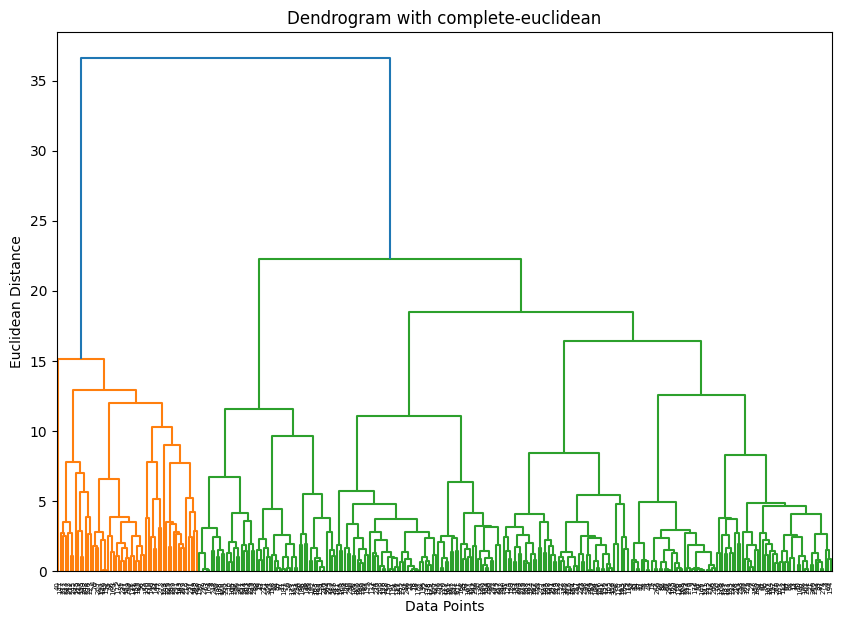

In [97]:
# Average Distance
linked = linkage(df_scaled, method='ward', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with " + best_linkage + "-" + best_metric)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

## Merge

In [98]:
# Add the cluster labels to the original data
df['Agglo'] = y_hc

# Analyze the clusters with the original values
df.head()

,AreaCategory,LuasTanah,LuasBangunan,JumlahKamar,JumlahKamarMandi,Lantai,HargaPenawaranOwner,ArahHadapRumah,PosisiRumah,LebarJalanDepanRumah,Agglo
0,Standard,240,300,4,3,2,3500000000,Utara,Standard,1-2 Mobil,0
1,Below Standard,30,60,2,1,2,287799000,Utara,Standard,< 1 Mobil,0
2,Standard,170,170,5,4,2,2699999999,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil,0
3,Sangat Premium,187,250,5,5,2,3100000000,Utara,Standard,1-2 Mobil,0
4,Premium,350,600,5,5,2,5000000000,Barat,Standard,1-2 Mobil,1


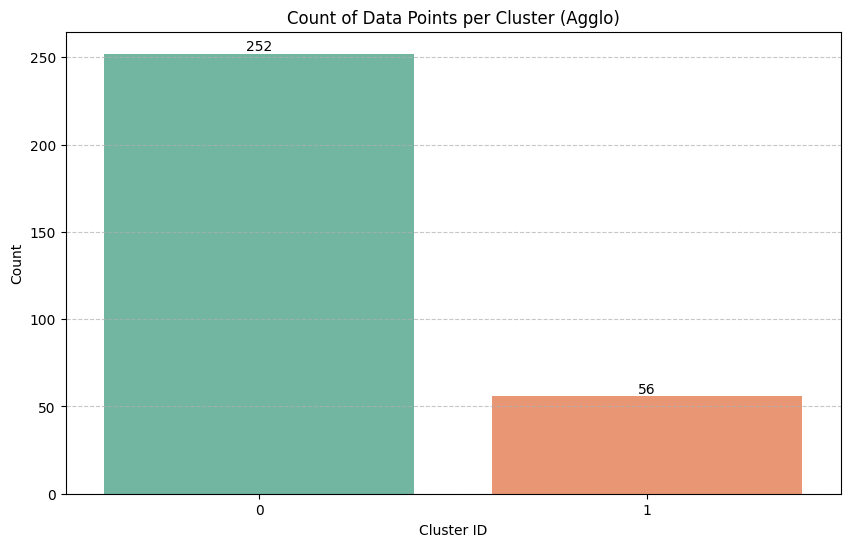

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Agglo'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

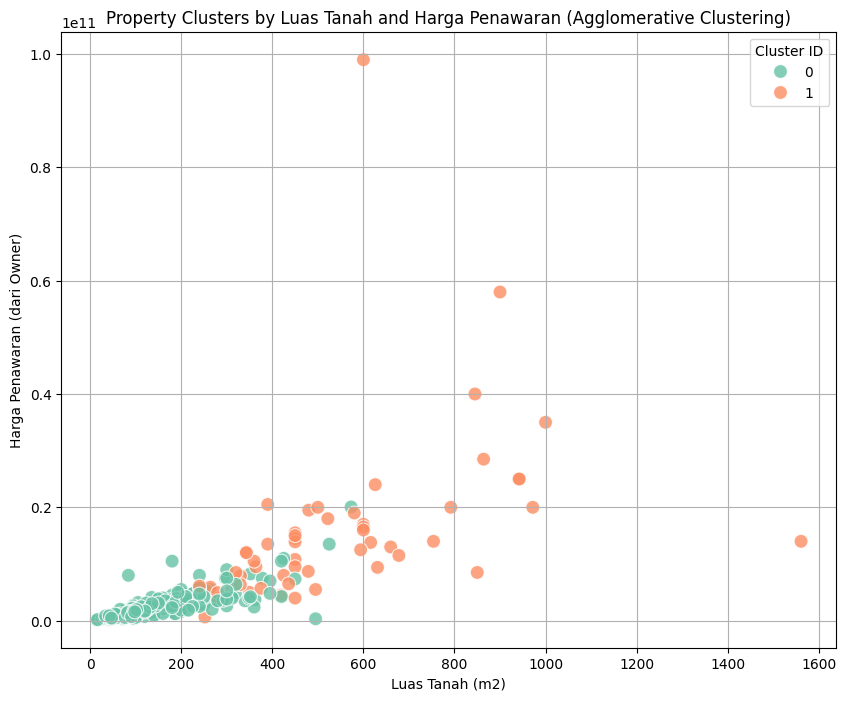

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='AnnualIncome', y='SpendingScore', hue='Agglo', palette='Set2', s=100, alpha=0.8)
plt.title('Customer Segments by Annual Income and Spending Score (Agglomerative Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster ID')
plt.grid(True)
plt.show()

In [103]:
import plotly.express as px

# Define the columns for the 3D scatter plot using property data features
x_col = 'LuasTanah'
y_col = 'LuasBangunan'
z_col = 'HargaPenawaranOwner'

# Create an interactive 3D scatter plot using Plotly Express
fig = px.scatter_3d(df,
                    x=x_col,
                    y=y_col,
                    z=z_col,
                    color=df['Agglo'].astype(str), # Color points by Agglo cluster, explicitly as string for discrete colors
                    title='Interactive 3D Scatter Plot of Properties by Agglo Clusters')

fig.show()

## Statistical Summary for each cluster

In [106]:
# Group data by cluster and compute summary stats
cluster_summary = df.groupby('Agglo').agg({
    'AreaCategory': ['count', lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0]],
    'LuasTanah': ['mean', 'std', 'min', 'max', 'size'],
    'LuasBangunan': ['mean', 'std', 'min', 'max', 'size'],
    'JumlahKamar': ['mean', 'std', 'min', 'max', 'size'],
    'JumlahKamarMandi': ['mean', 'std', 'min', 'max', 'size'],
    'Lantai': ['mean', 'std', 'min', 'max', 'size'],
    'HargaPenawaranOwner': ['mean', 'std', 'min', 'max', 'size'],
    'ArahHadapRumah': ['count', lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0]],
    'PosisiRumah': ['count', lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0]],
    'LebarJalanDepanRumah': ['count', lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0]]
})

# Rename the lambda label to 'mode'
cluster_summary = cluster_summary.rename(columns={'<lambda_0>': 'mode'}, level=1)

# Rename index title
cluster_summary = cluster_summary.rename_axis('cluster')

display(cluster_summary)


AreaCategory             LuasTanah                              \
               count      mode        mean         std  min   max size   
cluster                                                                  
0                252  Standard  157.876984   98.031566   14   573  252   
1                 56   Premium  537.785714  251.525073  240  1561   56   

        LuasBangunan                   ... HargaPenawaranOwner             \
                mean         std  min  ...                 std        min   
cluster                                ...                                  
0         188.674603  108.516459   14  ...        2.326445e+09  160000000   
1         617.750000  215.673090  300  ...        1.509604e+10  645000000   

                          ArahHadapRumah        PosisiRumah            \
                 max size          count   mode       count      mode   
cluster                                                                 
0        20055000000  252            252  Utara         252  Standard   
1        99000000000   56             56  Utara          56  Standard   

        LebarJalanDepanRumah             
                       count       mode  
cluster                                  
0                        252  1-2 Mobil  
1                         56  1-2 Mobil  

[2 rows x 38 columns]

# Interpretasi

### **Cluster 0 (n=252) — Pasar Menengah: Rumah Standar, Harga Terjangkau**

Profil:

*   Luas tanah rata-rata ±158 m²

*   Luas bangunan ±189 m²

*   Harga penawaran sekitar Rp 2,3 M

AreaCategory: Standard

Arah hadap & posisi rumah umumnya standar dengan akses jalan 1–2 mobil

Makna:
Ini adalah segmen keluarga kelas menengah yang mencari hunian nyaman, fungsional, dan terjangkau. Mereka lebih sensitif terhadap harga dan memprioritaskan lokasi aman, akses sekolah, supermarket, dan fasilitas umum.

Strategi:

*   Pricing: Gunakan competitive pricing untuk menjaga daya tarik.

*   Promosi: Tonjolkan kenyamanan, keamanan, dan akses fasilitas (bukan kemewahan).

*   Produk: Tawarkan opsi renovasi atau paket interior hemat.

*   Channel Pemasaran: Marketplace properti, Instagram Ads lokal, agen perumahan.

Fokus KPI:

*   Tingkat closing rate

*   Perbandingan harga kompetitor

*   Kecepatan penjualan listing (Days on Market)


### **Cluster 1 (n=56) — Pasar Premium: Rumah Besar, Harga Tinggi**

Profil:

*   Luas tanah rata-rata ±538 m²

*   Luas bangunan ±618 m²

*   Harga penawaran sekitar Rp 15 M

AreaCategory: Premium

Arah hadap: Utara, posisi rumah standar, jalan memadai 1–2 mobil

Makna:
Segmen high-end luxury buyers: eksekutif, pengusaha, keluarga mapan. Mereka tidak sensitif terhadap harga, melainkan mengejar prestige, privasi, dan eksklusivitas lokasi.

Strategi:

*   Positioning: Pasarkan sebagai luxury living dan status symbol.

*   Promosi: Gunakan sesi privat (private viewing), video tur, drone footage.

*   Layanan: Berikan pengalaman premium (konsultasi desain interior, concierge).

*   Channel Pemasaran: LinkedIn, Private Broker Network, Bank Priority Client Events.

Fokus KPI:

*   Customer Acquisition Cost (CAC) untuk segmen premium

*   Lead-to-Viewing Conversion Rate

*   Kepuasan pelanggan (experience & prestige perception)